<a href="https://colab.research.google.com/github/Harshilkothiya/RNN/blob/main/65_DL_deep_rnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM,GRU

In [ ]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train.shape

(25000, 100)

In [ ]:
# Define The simple RNN
model1 = Sequential()

model1.add(Embedding(10000, 32, input_length=100))
model1.add(SimpleRNN(5, input_shape = (100,1), return_sequences=False))
model1.add(Dense(1, activation = 'sigmoid'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history1 = model1.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9719 - loss: 0.0921 - val_accuracy: 0.7966 - val_loss: 0.6433
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9708 - loss: 0.0943 - val_accuracy: 0.7816 - val_loss: 0.6586
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9833 - loss: 0.0604 - val_accuracy: 0.7946 - val_loss: 0.7000
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9772 - loss: 0.0741 - val_accuracy: 0.7814 - val_loss: 0.7486
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9830 - loss: 0.0585 - val_accuracy: 0.7722 - val_loss: 0.7720


In [ ]:
# Define the Deep RNN model
model2 = Sequential()


model2.add(Embedding(10000, 32, input_length=100))  # Embedding layer to convert words to vectors
model2.add(SimpleRNN(5, return_sequences=True))     # RNN layer with 5 units
model2.add(SimpleRNN(5))                            # Another RNN layer with 5 units
model2.add(Dense(1, activation='sigmoid'))          # Output layer for binary classification

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 19ms/step - accuracy: 0.6779 - loss: 0.5850 - val_accuracy: 0.7962 - val_loss: 0.4575
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8621 - loss: 0.3384 - val_accuracy: 0.8144 - val_loss: 0.4477
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9149 - loss: 0.2287 - val_accuracy: 0.8108 - val_loss: 0.4827
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9477 - loss: 0.1538 - val_accuracy: 0.8044 - val_loss: 0.5241
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9639 - loss: 0.1139 - val_accuracy: 0.7880 - val_loss: 0.6085


In [ ]:
# Define the LSTM model
model3 = Sequential()


model3.add(Embedding(10000, 32, input_length=100))  # Embedding layer to convert words to vectors
model3.add(LSTM(5, return_sequences=True))                                 # LATM layer with 5 units
model3.add(LSTM(5))                                 # Another LATM layer with 5 units
model3.add(Dense(1, activation='sigmoid'))          # Output layer for binary classification

model3.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7065 - loss: 0.5542 - val_accuracy: 0.8268 - val_loss: 0.3997
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8908 - loss: 0.2941 - val_accuracy: 0.8366 - val_loss: 0.3747
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9291 - loss: 0.2069 - val_accuracy: 0.8350 - val_loss: 0.3835
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9508 - loss: 0.1487 - val_accuracy: 0.8364 - val_loss: 0.4275
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9657 - loss: 0.1137 - val_accuracy: 0.8300 - val_loss: 0.4707


In [ ]:
# Define the GRU model
model4 = Sequential()


model4.add(Embedding(10000, 32, input_length=100))  # Embedding layer to convert words to vectors
model4.add(GRU(5, return_sequences=True))                                  # LATM layer with 5 units
model4.add(GRU(5))                                  # Another LATM layer with 5 units
model4.add(Dense(1, activation='sigmoid'))          # Output layer for binary classification

model4.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history4 = model4.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6613 - loss: 0.5938 - val_accuracy: 0.8252 - val_loss: 0.4018
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8784 - loss: 0.3159 - val_accuracy: 0.8468 - val_loss: 0.3649
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9124 - loss: 0.2388 - val_accuracy: 0.8400 - val_loss: 0.3779
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9375 - loss: 0.1839 - val_accuracy: 0.8392 - val_loss: 0.4025
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9513 - loss: 0.1487 - val_accuracy: 0.8434 - val_loss: 0.4248


In [ ]:
import numpy as np

acc = []
val_acc = []

for i in range(1, 5):
  acc.append(np.average(globals()[f"history{i}"].history['accuracy']))
  val_acc.append(np.average(globals()[f"history{i}"].history['val_accuracy']))


In [ ]:
acc

[0.9726999998092651,
 0.8855199933052063,
 0.8978600144386292,
 0.8803799986839295]

In [ ]:
val_acc

[0.7852800011634826,
 0.8027600049972534,
 0.8329599857330322,
 0.8389200091361999]

In [ ]:
import matplotlib.pyplot as plt

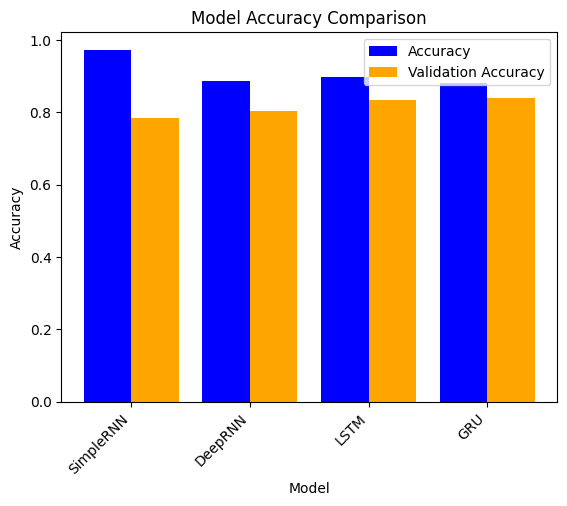

In [ ]:
labels = ['SimpleRNN', 'DeepRNN', 'LSTM', 'GRU']


x = np.arange(len(labels))  # Label locations
width = 0.4  # Bar width

# Plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc, width, label='Accuracy', color='blue')
rects2 = ax.bar(x + width/2, val_acc, width, label='Validation Accuracy', color='orange')

# Labels, title, and formatting
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')  # Ensure labels are displayed clearly
ax.legend()
